In [ ]:
# Install Watson library
#
!pip install --upgrade watson-developer-cloud

In [2]:
# Get the apikey for the Visual Recognition service instance:
# 1. From the *Services* menu in Watson Studio ( ^^ ) right-click "Watson Services" and then open the link in a new browser tab
# 2. In the new Watson services tab, click the service instance in the Visual Recognition list
# 3. In the "Credentials" tab, expand credentials and then copy the apikey
#
apikey = '' # <-- PASTE YOUR APIKEY HERE

In [3]:
# Get the ID of the trained Visual Recognition custom model:
# 1. From the *Services* menu in Watson Studio ( ^^ ) right-click "Watson Services" and then open the link in a new browser tab
# 2. In the new Watson services tab, click the service instance in the Visual Recognition list
# 3. In the "Overview" tab, scroll down to the list of your custom models and then click "Copy model ID"
#
model_id = '' # <-- PASTE YOUR MODEL ID HERE

In [4]:
# Instantiate a visual recognition object
#
from watson_developer_cloud import VisualRecognitionV3
visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )

In [7]:
# Sample images of flags for testing your trained model
#
url_1 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/flags/test-data/heart-flag-canada.jpg'
url_2 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/flags/test-data/torn-american-flag.jpg'

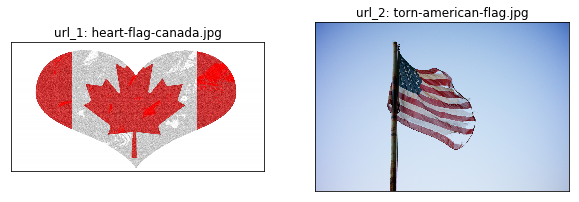

In [9]:
# View the test images
#
from skimage import io
import matplotlib.pyplot as plt
import re
fig, axs = plt.subplots( 1, 2, figsize=( 10, 5 ) )
axs[0].imshow( io.imread(url_1) )
axs[1].imshow( io.imread(url_2) )
axs[0].set_title( 'url_1: ' + re.sub( '.*\/', '', url_1 ) )
axs[1].set_title( 'url_2: ' + re.sub( '.*\/', '', url_2 ) )
for img in axs:
    img.set_xticks([])
    img.set_yticks([])


In [12]:
# Classify the test images
#
# *Change the url parameter from url_1 to url_2 to test the different sample images
#
import json
results = visual_recognition.classify( url=url_1, threshold='0', classifier_ids=model_id ).get_result()
print( json.dumps( results, indent=2 ) )

{
  "custom_classes": 2,
  "images_processed": 1,
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "flags_1317368117",
          "classes": [
            {
              "score": 0.918,
              "class": "Canada"
            },
            {
              "score": 0.017,
              "class": "USA"
            }
          ],
          "name": "flags"
        }
      ],
      "source_url": "https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/flags/test-data/heart-flag-canada.jpg",
      "resolved_url": "https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/flags/test-data/heart-flag-canada.jpg"
    }
  ]
}
